In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.linalg import eigvalsh

import algo
import utils
import interactions
import dicke

In [2]:
def ising_mag(J0s, wz, alpha, gs, beta, N, M):
    return np.abs(np.array([algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)[0] for J0 in J0s]))

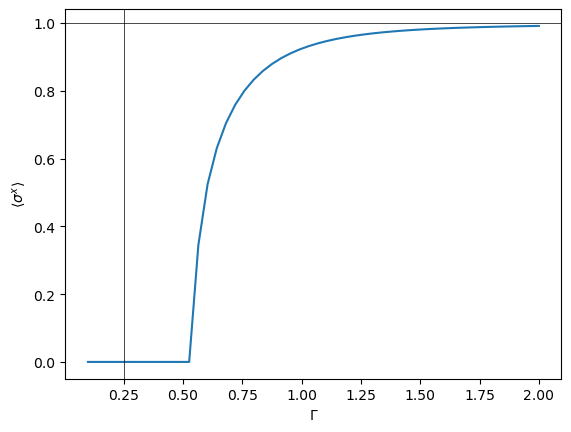

In [4]:
N = 70
M = int(np.sqrt(N) * np.log(N))
beta = 1
wz = 1
J0s = np.linspace(0.1, 2.0, 50)
alpha = 1.5

gs = 0.00 * np.ones(N)

J = interactions.powerlaw_pbc(N, alpha)
J = interactions.shift(J, 0.0)

mags = []
for J0 in J0s:
    J = J0 * interactions.rescale(J)
    ws, lams = utils.dicke_from_ising(J, 1e-6)
    #print(ws[-1] * J0)
    #print(np.sqrt(N) * lams[:, 0])
    #plt.imshow(lams)
    #plt.show()
    #ws, lams = utils.truncate_dicke(ws, lams, M)
    mags.append(dicke.mag_longitudinal_hessian_debug(beta, wz, ws, np.sqrt(N) * lams, gs, N)[0])
mags = np.abs(np.array(mags))

plt.plot(J0s, mags)
plt.axvline(0.25, c='k', lw=0.5)
plt.axhline(1.00, c='k', lw=0.5)
plt.xlabel(r'$\Gamma$')
plt.ylabel(r'$\langle \sigma^x \rangle$')
plt.show()

Rounds to go: 2, current critical point:  0.6241379310344827 ...
Rounds to go: 1, current critical point:  0.659080459770115 ...


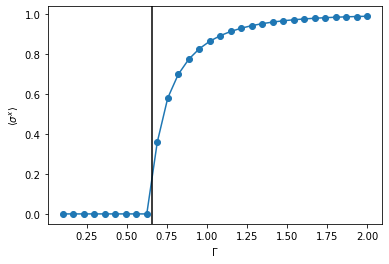

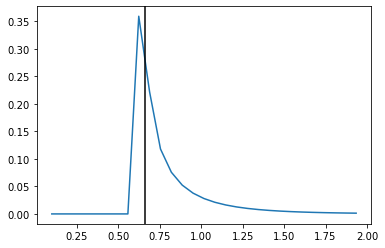

In [4]:
marker_kwargs = {'c': 'k',
                 'lw': 0,
                 'marker': 'o',
                 'fillstyle': 'none',
                 'markevery': 3,
                 'markersize': 10,
                 'markeredgewidth': 1.5,
                }

N = 70
M = int(np.sqrt(N) * np.log(N))
beta = 1 / 1.25
wz = 1
J0s = np.linspace(0.1, 2, 30)
alpha = 0.5

gs = 0.0 * np.ones(N)

plt.plot(J0s, ising_mag(J0s, wz, alpha, gs, beta, N, M), marker='o')
plt.xlabel(r'$\Gamma$')
plt.ylabel(r'$\langle \sigma^x \rangle$')

critical_J0 = utils.critical_point_recursive_refinement(ising_mag, J0s, [wz, alpha, gs, beta, N, M], rounds=3, verbose=True)
plt.axvline(critical_J0, c='k')

plt.show()

op = ising_mag(J0s, wz, alpha, gs, beta, N, M)
rel_diff = (op[1:] - op[:-1])

plt.plot(J0s[:-1], rel_diff)
plt.axvline(critical_J0, c='k')
plt.show()

$\alpha_\chi =$  0.0007568517931777361
[7.56851793e-04 7.15011952e+00]


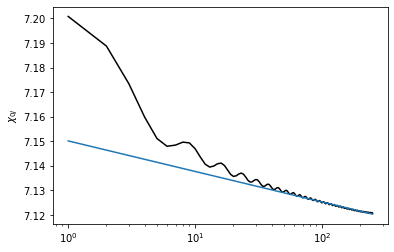

In [82]:
def correlation_length_fit(r, l, A):
    return A * r**(-l) 

N = 500
M = int(np.sqrt(N) * np.log(N))
beta = 1 / 0.05
wz = 1
J0 = 0.25
alpha = 0.7

gs = 0.0 * np.ones(N)
dg = 5e-3 * wz

i = 0
   
gs = 0.0 * np.ones(N)
mxs0 = algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)
gs[i] = dg
mxs1 = algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)
susc = ((mxs1 - mxs0) / dg)

rs = np.arange(1, N//2, 1)
fit_start = N//8
fit_rs = np.arange(fit_start, 4*N//8, 1)
plt.plot(rs, susc[1:N//2], c='k')
popt, pcov = curve_fit(correlation_length_fit, fit_rs, susc[fit_start:4*N//8], p0=[1, 1])
print(r'$\alpha_\chi =$ ', popt[0])
print(popt)
plt.plot(rs, correlation_length_fit(rs, *popt))

#ax.axvline(0.25, c='k', lw=0.5)
#plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\chi_{0j}$')
plt.show()

0.0008221515108215053 -1.189009267541963e-05


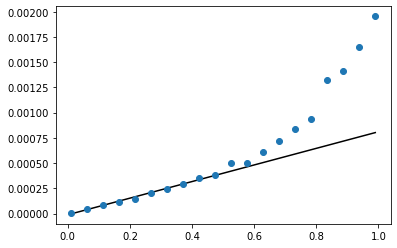

In [84]:
marker_kwargs = {'c': 'k',
                 'lw': 0,
                 'marker': 'o',
                 'fillstyle': 'none',
                 'markevery': 3,
                 'markersize': 10,
                 'markeredgewidth': 1.5,
                }

N = 500
M = int(np.sqrt(N) * np.log(N))
wz = 1
beta = 1 / 0.05
J0 = 0.25

gs = 0.0 * np.ones(N)
dg = 5e-3 * wz

i = 0

alphas = np.linspace(0.01, 0.99, 20)
crit_exp = []
for alpha in alphas:
    gs = 0.0 * np.ones(N)
    mxs0 = algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)
    gs[i] = dg
    mxs1 = algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)
    susc = ((mxs1 - mxs0) / dg)

    fit_start = N//8
    #rs = np.arange(1, N//2, 1)
    #ax.plot(rs, susc[1:N//2], c='k')
    popt, pcov = curve_fit(correlation_length_fit, np.arange(fit_start,4*N//8, 1), susc[fit_start:4*N//8], p0=[1, 1])
    crit_exp.append(popt[0])
    
    
def correlation_decay_fit(x, m, n):
    return x*m + n

popt, pcov = curve_fit(correlation_decay_fit, alphas[:2*len(alphas)//4], crit_exp[:2*len(alphas)//4], p0=(1, 0))
print(*popt)
plt.plot(alphas, correlation_decay_fit(alphas, *popt), c='k')
plt.plot(alphas, crit_exp, lw=0, marker='o')
plt.show()

In [60]:
0.670866014377453
0.6635922496836434
0.6648414045219964
0.66985033482133


0.66985033482133

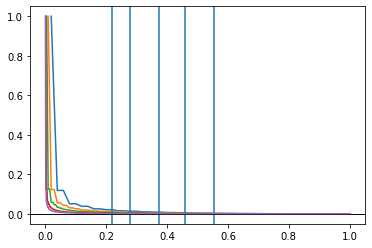

In [42]:
Ns = [50, 100, 200, 500, 1000]
alpha = 0.2

from scipy.linalg import eigh

for N in Ns:
    Jbase = interactions.powerlaw_pbc(N, alpha)
    Jbase = interactions.shift(Jbase, 0.)
    Jbase = interactions.rescale(Jbase)

    vals = eigh(Jbase, eigvals_only=True)
    plt.plot(np.arange(1, len(vals) + 1) / N, vals[::-1]) 
    plt.axvline(np.sqrt(N) * np.log(N) / N)
    plt.axhline(0, lw=0.5, c='k')
    
plt.show()

[0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]
[0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.707

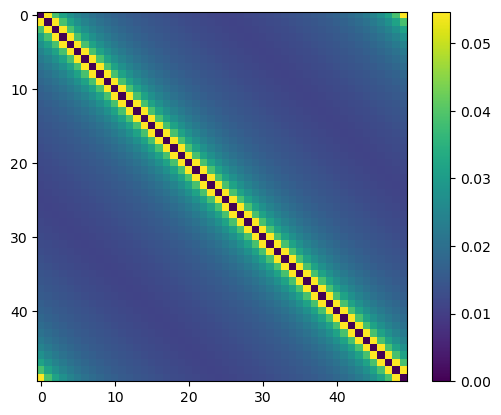

Eigvals: [-8.64813976e-20  3.45993093e-17  1.16453940e-04  5.29854067e-04
  5.29854067e-04  8.25102952e-04  8.25102952e-04  1.79179806e-03
  1.79179806e-03  2.51874527e-03  2.51874527e-03  3.97115055e-03
  3.97115055e-03  5.17509433e-03  5.17509433e-03  7.19606126e-03
  7.19606126e-03  8.95619671e-03  8.95619671e-03  1.16792232e-02
  1.16792232e-02  1.41256957e-02  1.41256957e-02  1.77671954e-02
  1.77671954e-02  2.11148223e-02  2.11148223e-02  2.60401511e-02
  2.60401511e-02  3.06593410e-02  3.06593410e-02  3.75315842e-02
  3.75315842e-02  4.41144773e-02  4.41144773e-02  5.42815383e-02
  5.42815383e-02  6.43005280e-02  6.43005280e-02  8.10490371e-02
  8.10490371e-02  9.83985650e-02  9.83985650e-02  1.32882631e-01
  1.32882631e-01  1.73479868e-01  1.73479868e-01  3.15494919e-01
  3.15494919e-01  1.00000000e+00]
[8.58708602e+03 1.88731211e+03 1.88731211e+03 1.21196997e+03
 1.21196997e+03 5.58098607e+02 5.58098607e+02 3.97023078e+02
 3.97023078e+02 2.51816190e+02 2.51816190e+02 1.9323319

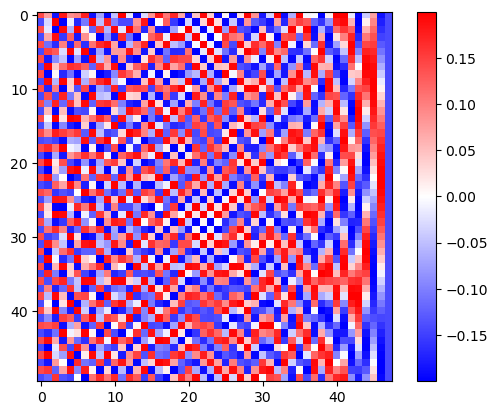



1.0000000000000002


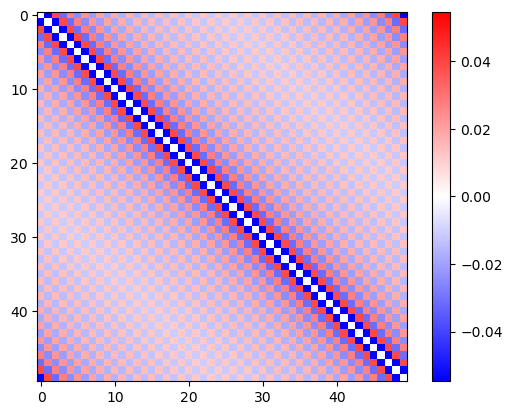

Eigvals: [-8.64813976e-20  3.45993093e-17  1.16453940e-04  5.29854067e-04
  5.29854067e-04  8.25102952e-04  8.25102952e-04  1.79179806e-03
  1.79179806e-03  2.51874527e-03  2.51874527e-03  3.97115055e-03
  3.97115055e-03  5.17509433e-03  5.17509433e-03  7.19606126e-03
  7.19606126e-03  8.95619671e-03  8.95619671e-03  1.16792232e-02
  1.16792232e-02  1.41256957e-02  1.41256957e-02  1.77671954e-02
  1.77671954e-02  2.11148223e-02  2.11148223e-02  2.60401511e-02
  2.60401511e-02  3.06593410e-02  3.06593410e-02  3.75315842e-02
  3.75315842e-02  4.41144773e-02  4.41144773e-02  5.42815383e-02
  5.42815383e-02  6.43005280e-02  6.43005280e-02  8.10490371e-02
  8.10490371e-02  9.83985650e-02  9.83985650e-02  1.32882631e-01
  1.32882631e-01  1.73479868e-01  1.73479868e-01  3.15494919e-01
  3.15494919e-01  1.00000000e+00]
[8.58708602e+03 1.88731211e+03 1.88731211e+03 1.21196997e+03
 1.21196997e+03 5.58098607e+02 5.58098607e+02 3.97023078e+02
 3.97023078e+02 2.51816190e+02 2.51816190e+02 1.9323319

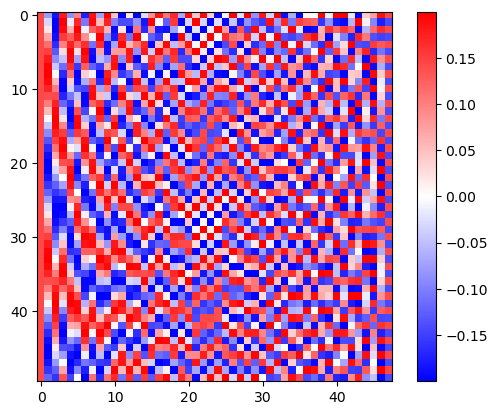

In [4]:
N = 50
M = int(np.sqrt(N) * np.log(N))
beta = 1
wz = 1
J0s = np.linspace(0.1, 2.0, 50)
alpha = 0.5

gs = 0.00 * np.ones(N)

J = interactions.powerlaw_pbc(N, alpha)
afmJ = interactions.powerlaw_pbc_afm(N, alpha)

print(np.diag(J, k=2))
print(np.diag(afmJ, k=2))
print(np.sum(J[1:, 0]))
print(np.sum(afmJ[1:, 0]))
J = interactions.shift(J, 0.0)
ds = eigvalsh(J)
#print(f'Eigvals unrescaled: {ds}')
J, S = interactions.rescale(J, return_scale=True)

plt.imshow(J - np.diag(np.diag(J)))
plt.colorbar()
plt.show()


ds = eigvalsh(J)
print(f'Eigvals: {ds}')
ws, lams = utils.dicke_from_ising(J, 1e-6)
print(ws)
plt.imshow(lams, cmap='bwr')
plt.colorbar()
plt.show()

print()
print()

afmJ = interactions.shift(afmJ, 0.0)
afmJ = afmJ/S
print(np.sum(J[0, :]))
#afmJ = interactions.rescale(afmJ)
vmax = np.amax(np.abs(afmJ - np.diag(np.diag(afmJ))))
plt.imshow(afmJ - np.diag(np.diag(afmJ)), cmap='bwr', vmin=-vmax, vmax=vmax)
plt.colorbar()
plt.show()

from scipy.linalg import eigvalsh
ds = eigvalsh(afmJ)
print(f'Eigvals: {ds}')
ws, lams = utils.dicke_from_ising(afmJ, 1e-6)
print(ws)
plt.imshow(lams, cmap='bwr')
plt.colorbar()
plt.show()

print()
print()

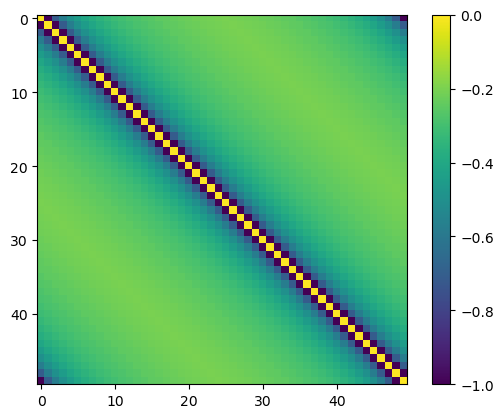

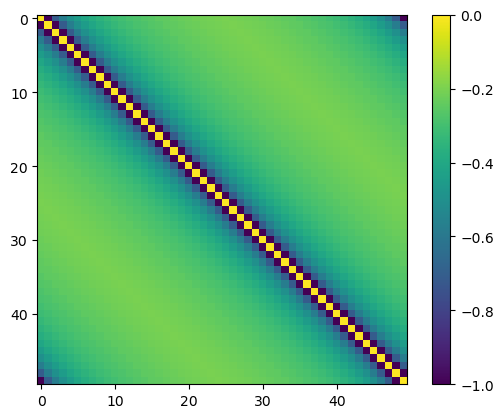

-0.0
17.078624382340884


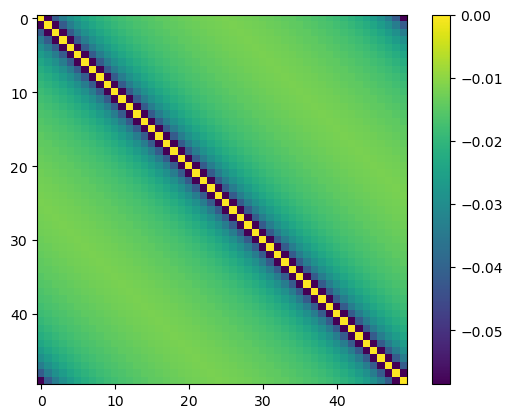

Eigvals: [-1.         -0.26700144 -0.26700144 -0.11492539 -0.11492539 -0.07145206
 -0.07145206 -0.03452499 -0.03452499 -0.01594634 -0.01594634  0.00198871
  0.00198871  0.01271749  0.01271749  0.02360484  0.02360484  0.03065409
  0.03065409  0.0380132   0.0380132   0.04295963  0.04295963  0.04823389
  0.04823389  0.05181868  0.05181868  0.05571816  0.05571816  0.05833795
  0.05833795  0.06125389  0.06125389  0.06313872  0.06313872  0.06530286
  0.06530286  0.0665921   0.0665921   0.0681474   0.0681474   0.06892585
  0.06892585  0.06996103  0.06996103  0.07027719  0.07027719  0.07071988
  0.07084459  0.07084459]
[ -1.          -3.74529814  -3.74529814  -8.7012973   -8.7012973
 -13.99539763 -13.99539763 -28.96453069 -28.96453069 -62.71032489
 -62.71032489 502.83780414 502.83780414  78.63184534  78.63184534
  42.36420028  42.36420028  32.62207274  32.62207274  26.30665428
  26.30665428  23.27766772  23.27766772  20.73230999  20.73230999
  19.29806004  19.29806004  17.94746981  17.94746981

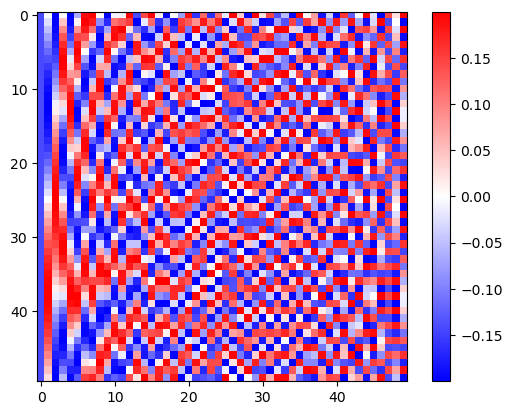

In [5]:
N = 50
M = int(np.sqrt(N) * np.log(N))
beta = 1
wz = 1
J0s = np.linspace(0.1, 2.0, 50)
alpha = 0.5

gs = 0.00 * np.ones(N)

J = -interactions.powerlaw_pbc(N, alpha)
plt.imshow(J - np.diag(np.diag(J)))
plt.colorbar()
plt.show()
#J = interactions.shift(J, 0.0)
plt.imshow(J - np.diag(np.diag(J)))
plt.colorbar()
plt.show()
_, S = interactions.rescale(J, return_scale=True)
print(J[0, 0])
print(S)
J = J / S

plt.imshow(J - np.diag(np.diag(J)))
plt.colorbar()
plt.show()

from scipy.linalg import eigvalsh
ds = eigvalsh(J)
print(f'Eigvals: {ds}')
ws, lams = utils.dicke_from_ising(J, 1e-6)
print(ws)
plt.imshow(lams, cmap='bwr')
plt.colorbar()
plt.show()